In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

In [ ]:
stats = './result/500/stats.txt'
df = pd.read_csv(stats)

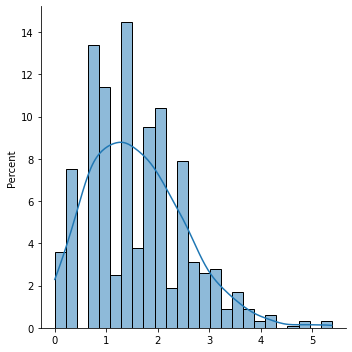

In [4]:
df.describe()
errors = (1.0 - df['n#intx_cand_mst_best'] / df['n#intx_cand_mst']) * 100.0
#errors.hist(bins = 100)
#df.head()
sns.displot(errors, kind='hist', stat='percent', kde=True)
#df.apply(lambda row: row['#intx_cand_mst_best'] / row['n#intx_cand_mst'])

In [70]:
n_nodes = 30
n_neighbours = 20
n_samples = 100
index = 0


cols = [str(i) for i in range(n_neighbours)]
#df_stat = pd.DataFrame({'pos':[], 'value':[]})

d = {}; first = True
for index in range(n_samples):
    file = f'result/vn_{n_nodes}/beta/{index}.txt'
    with open(file, 'r') as f:
        lines = f.readlines()

    for i in range(n_neighbours):
        d[str(i)] = 0

    for line in lines[1:-2]:
        items = line.strip().split()
        #print(items[1:])
        for item in items[1:]:
            if item not in d.keys():
                d[item] = 1
            else:
                d[item] += 1
        df = pd.DataFrame([d])

    #compute df_stat
    values = [d[x] for x in d.keys()]
    pos = [x for x in d.keys()]
    df_stat_one = pd.DataFrame({'pos': pos, 'value': values})

    if first:
        first = False
        df_final = df
        df_stat_final = df_stat_one
    else:
        df_final = pd.concat([df_final, df], ignore_index=True, axis=0)
        df_stat_final = pd.concat([df_stat_final, df_stat_one], ignore_index=True, axis=0)
#print(df_final)
df_final.describe()
df_stat_final.describe()


#print(df_final.mean(), df_final.std())

,value
count,2000.00000
mean,7.50000
std,9.13448
min,0.00000
25%,1.00000
50%,3.00000
75%,11.00000
max,30.00000


<AxesSubplot:xlabel='pos', ylabel='value'>

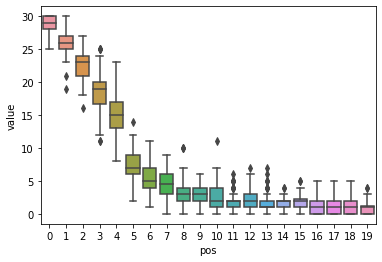

In [78]:
ax = plt.subplot(111)
x = [i for i in range(n_neighbours)]
y = (df_final.mean() / n_nodes).values
std = (df_final.std() / n_nodes).values

data = { "position": x,
         "mean": y.tolist(),
         "y_min" : (y - std).tolist(),
         "y_max" : (y + std).tolist() }
#print(data)
df_box = pd.DataFrame(data)

sns.boxplot(x='pos', y='value', data=df_stat_final)
#sns.swarmplot(x='pos', y='value', data=df_stat_final, color='grey')
#print(data)
#sns.barplot(x=x, y=y, ax=ax)#, palette="deep")


In [44]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [32]:
tips = sns.load_dataset('tips')
# sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
#                split=True, inner="quart", linewidth=1,
#                palette={"Yes": "b", "No": ".85"})
# sns.despine(left=True)
tips.head()
#tips.describe()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
path='result/instances/stats/'
file='stats1.txt'

_REGEX_INSTANCE_NAME = r'^\-+([\d\w]+)\-+'
_REGEX_INNER_LINE = r'^\(((?:[\d\.]+(?:\,\s*)?)+)\)$'
#_REGEX_REPEAT_MATCH = r'((?:[\d\.]+)+)(?:\,\s*)?'
_METHODS = ['LKH', 'NeuroLKH', 'NeuroLKH/m']

filename = path + file


with open(filename, 'r') as f:
    lines = f.readlines()

method = 0
p = re.compile(_REGEX_INSTANCE_NAME)
p2 = re.compile(_REGEX_INNER_LINE)

d = {  'instance': '',
       'method': '',
       'successes': 0,
       'best': 0,
       'avg': 0,
       'trials_min': 0,
       'trials_avg': 0,
       'time': 0 }

df = None
for line in lines:
    
    m = p.match(line)
    if m:
        method = 0
        instance = m.group(1)
        print(instance)
    else:
        m = p2.match(line)
        if m:
            parsed = m.group(1).replace(' ','').split(',')
            #print(method, parsed)

            d = {  'instance': instance,
                    'method': _METHODS[method],
                    'successes': int(parsed[0]),
                    'best': float(parsed[1]),
                    'avg': float(parsed[2]),
                    'trials_min': float(parsed[3]),
                    'trials_avg': float(parsed[4]),
                    'time': float(parsed[5]) }
            #print(d)
            if df is None:
                df = pd.DataFrame([d])
            else:
                df = pd.concat([df, pd.DataFrame([d])],ignore_index=True, axis=0)
            method += 1
df


kroB150
rat195
pr299
d493
rat575
pr1002
u1060
vm1084
pcb1173
rl1304


,instance,method,successes,best,avg,trials_min,trials_avg,time
0,kroB150,LKH,2,26130.0,26131.6,23.0,128.4,0.34
1,kroB150,NeuroLKH,10,26130.0,26130.0,1.0,9.8,0.07
2,kroB150,NeuroLKH/m,10,26130.0,26130.0,1.0,22.1,0.13
3,rat195,LKH,9,2323.0,2323.5,1.0,55.0,0.22
4,rat195,NeuroLKH,10,2323.0,2323.0,1.0,8.4,0.11
5,rat195,NeuroLKH/m,10,2323.0,2323.0,1.0,3.9,0.10
6,pr299,LKH,9,48191.0,48194.3,1.0,51.7,0.49
7,pr299,NeuroLKH,10,48191.0,48191.0,1.0,10.1,0.26
8,pr299,NeuroLKH/m,10,48191.0,48191.0,1.0,13.2,0.36
9,d493,LKH,6,35002.0,35002.8,1.0,219.6,4.85


In [81]:
df['cum.gap'] = (df['avg'] - df['best']) * 10

df2 = df.groupby('instance').sum()
df2.sort_values('cum.gap', ascending=True)
#df2.apply(lambda x: x.sort_values('avg', ascending=True))
df2


,successes,best,avg,trials_min,trials_avg,time,cum.gap,col.order
instance,,,,,,,,
d493,22,105006.0,105037.0,50.0,567.6,15.81,310.0,0
kroB150,22,78390.0,78391.6,25.0,160.3,0.54,16.0,3
pcb1173,21,170676.0,170680.5,65.0,1632.6,21.78,45.0,6
pr1002,28,777135.0,777135.6,31.0,913.6,14.98,6.0,9
pr299,29,144573.0,144576.3,3.0,75.0,1.11,33.0,12
rat195,29,6969.0,6969.5,3.0,67.3,0.43,5.0,15
rat575,18,20319.0,20320.2,230.0,1051.2,10.20,12.0,18
rl1304,21,758844.0,759062.6,419.0,2007.2,39.41,2186.0,21
u1060,25,672282.0,672295.5,41.0,945.6,195.42,135.0,24


In [78]:
col_order = df2.index.values.tolist()

df['col.order'] = df['instance'].apply(lambda x: col_order.index(x))
#df.sort_values('col.order', ascending=True)
print(col_order)

['d493', 'kroB150', 'pcb1173', 'pr1002', 'pr299', 'rat195', 'rat575', 'rl1304', 'u1060', 'vm1084']


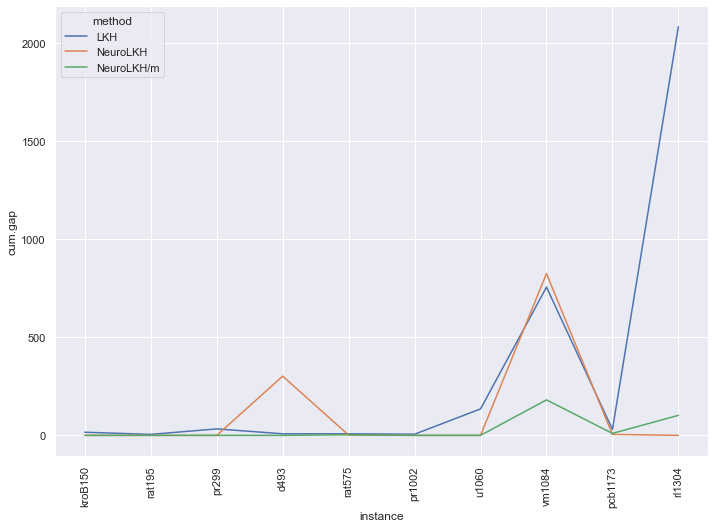

In [74]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)



sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.lineplot(data=df, x='instance', y='cum.gap', hue='method', sort=False)
#g.set(yscale='log')
